# Methods and Plan & Computational Code and Output (Individual Assignment 2)

<center>Alifais Farrel Ramdhani</center>
<center>(47184825)</center>
<center>Group 31</center>

## Methods and Plan
In the previous report, we have devised a research question as follow:

Could we found any pattern arise from each explanatory variable that lead to diabetes? If so, could we develop a statistical modelling from the STAT 301 course that could predict if a patients (with same criteria of the sample data, which are females who are older than 21 years old of Pima Indian heritage) have diabetes based on single, multiple, or all explanatory variable? Hence, with the given statement, what are the result or accuracy of the prediction model and what does this meant for prediction diabetes?

Based on the preliminary analysis and explanatory data analysis from before, it can be concluded that there seems to be a possible patttern from each explanatory variable that lead to diabetes, therefore in this report, we will focused on the statistical modelling to predict diabetes and reporting the accuracy of the prediction model.

As the outcome for the statistical modelling will be focused on wheter a person (with same criteria of the sample data, which are females who are older than 21 years old of Pima Indian heritage) have diabetes or not (boolean or binary outcome), based on the literature review and class material, worksheet, tutorial, and after consultation with our TA, we conclude that Logistic Regression would be appropriate to adress this matter.

Logistic regression was used since it is specifically designed to be used for clasification and the sigmoid function maps predicted values to a probability range between 0 and 1 which align with the ```Outcome``` of the dataset which emphasize 0 (not diabetic) or 1 (diabetic).

In order to implement Logistic Regression in this data, some assumptions has been made in which are:
1. Binary output of 1 for diabetic and vice versa
2. All variable is independence
3. There is no multi-colinearity on the data as it could distort coefficient estimates and their interpretability
4. A linear relationship between the predictor and the log odds of the outcome variable

However, there are some drawbacks to using Logistic Regression such as:
1. Sensitive to outlier
2. The need to have a sufficient number of data and the data is evenly distributed such as having the same ratio of diabetic and non-diabetic data
3. Multicollinearity (if there is any) could impact the model and reduce the interpretability and accuracy significantly.

Therefore based on the possible implementation and the assumption and drawbacks, it can be concluded that our step in implementing the model is as such:
1. Data preprocessing by removing empty or 0 value variables based on EDA results, evenly split the data to be 50% diabetic and 50% non-diabetic outcome, and train test split the dataset
2. Model building: Building the model using the mentioned specification such as using Logistic Regression
3. Evaluate and reiterate: Removing any multicolinearity and testing the model good fit
4. Evaluate the model by using the test dataset and using AUC (Degree or measure of separability)


## Implementation of a Proposed Model

In [1]:
# Import the necessary dependencies (library)
library(dplyr)
library(tidyverse)
library(corrplot)
library(pROC)
library(car)
library(broom)
library(purrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some



### Website and Data Information (Based on Previous Assignment)
[Predict Diabetes](https://www.kaggle.com/datasets/whenamancodes/predict-diabities)

### Dataset Information
**Dataset Information (Based on the website):**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 2. From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

**Dataset Variable Information (Based on the website):**

| Columns    | Description |
| -------- | ------- |
| Pregnancies  | To express the Number of pregnancies    |
|Glucose|To express the Glucose level in blood |
|BloodPressure|To express the Blood pressure measurement|
|SkinThickness|To express the thickness of the skin|
|Insulin|	To express the Insulin level in blood|
|BMI|	To express the Body mass index|
|DiabetesPedigreeFunction|To express the Diabetes percentage|
|Age	|	To express the age|
|Outcome|To express the final result 1 is Yes and 0 is No|

### Dataset Interpretation
**Dataset Interpretation:**

Based on this given documentation, it can be concluded that the dataset is a data of patients health information. The patients data is gathered from females with at least 21 years old of Pima Indian heritage (Indigenous people of the Americas living in the United States in central and southern Arizona and northwestern Mexico in the states of Sonora and Chihuahua [Wikipedia](https://en.wikipedia.org/wiki/Akimel_O%27odham)).

The purpose of this dataset is to find if there is a statistical correlation and if a prediction could be made based on this data. This data consist of 9 type of datas with 8 data as the predictor and 1 data (Outcome) as a response variable. The dataset already provide a clear description of each variable, however, it seems there is no provided unit of measurment of each variable although some variable such as outcome and pregnancies are easily identified. Hence, additional description of data is made with appropriate variable description and unit of measurement as such:

**Dataset Modified Description:**

| Columns    | Description | Unit of Measurement |
| -------- | ------- | ------- |
| Pregnancies  | To express the Number of pregnancies    | Count (integer)|
|Glucose|To express the Glucose level in blood |mg/dL of blood |
|BloodPressure|To express the Blood pressure measurement| mmHg |
|SkinThickness|To express the thickness of the skin| Unknown |
|Insulin|	To express the Insulin level in blood| Unknown |
|BMI|	To express the Body mass index|Kg/m<sup>2</sup>|
|DiabetesPedigreeFunction|To express the Diabetes percentage|% Percent |
|Age	|	To express the age| Age (Integer)|
|Outcome|To express the final result 1 is Yes and 0 is No| Integer/Boolean/Yes or No|

Based on this improved dataset variables information, we can know what unit of measurement each variable represent although some variable does not have clear unit of measurement.

### Loading and Data Cleaning

In [2]:
# Read the data
diabetes <- read.csv('diabetes.csv')

# Clean the data
diabetes_clean <- diabetes |>
    filter(Glucose != 0 & BloodPressure != 0 & SkinThickness != 0 & Insulin != 0 & BMI != 0 & Age != 0) |>
    mutate(Outcome = as.factor(Outcome)) |>
    filter_all(all_vars(. != "" & !is.na(.)))

head(diabetes_clean)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,1,89,66,23,94,28.1,0.167,21,0
2,0,137,40,35,168,43.1,2.288,33,1
3,3,78,50,32,88,31.0,0.248,26,1
4,2,197,70,45,543,30.5,0.158,53,1
5,1,189,60,23,846,30.1,0.398,59,1
6,5,166,72,19,175,25.8,0.587,51,1


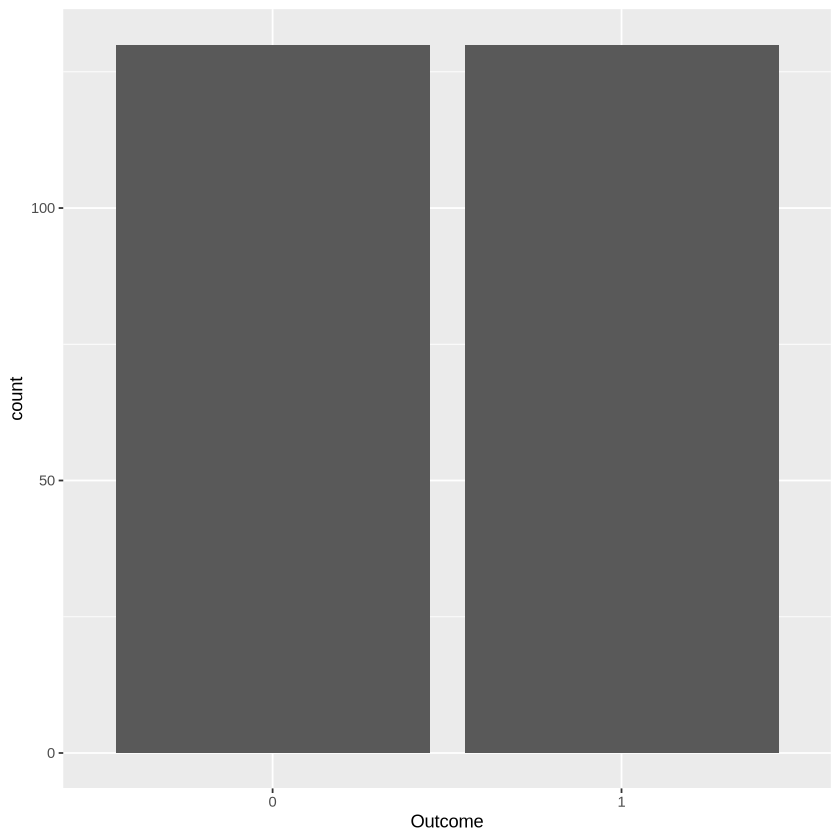

In [3]:
# Balance the data such that the ratio between Outcome value of 0 and 1 is the same
count_outcome_0 <- sum(diabetes_clean$Outcome == 0)
count_outcome_1 <- sum(diabetes_clean$Outcome == 1)
count_outcome_minimum <- min(count_outcome_0, count_outcome_1)

diabetes_balanced <- diabetes_clean %>%
  group_by(Outcome) %>%
  sample_n(count_outcome_minimum)

ggplot(diabetes_balanced, aes(x = Outcome)) +
  geom_bar()

# Train test split of 0.8 and 0.1 ratio
# Add ID by row number
diabetes_balanced <- diabetes_balanced |>
    mutate(ID = row_number())

diabetes_train <-
    diabetes_balanced |>
    slice_sample(prop = 0.8)

diabetes_test <-
    diabetes_balanced |>
    anti_join(diabetes_train, by = "ID")

# Remove the ID after the split
diabetes_train <- diabetes_train |>
    select(-ID)

diabetes_test <- diabetes_test |>
    select(-ID)

### Implementation of a Proposed Model

In [4]:
# Fit the full model to Logistic Regression
full_diabetes_model <- glm(Outcome ~ .,
                            data = diabetes_train,
                            family = "binomial")

summary(full_diabetes_model)
vif(full_diabetes_model)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = diabetes_train)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.059e+01  1.752e+00  -6.047 1.48e-09 ***
Pregnancies               4.312e-02  7.753e-02   0.556    0.578    
Glucose                   4.647e-02  8.462e-03   5.492 3.97e-08 ***
BloodPressure            -6.967e-03  1.616e-02  -0.431    0.666    
SkinThickness             2.544e-02  2.363e-02   1.076    0.282    
Insulin                   4.296e-04  2.172e-03   0.198    0.843    
BMI                       8.037e-02  3.585e-02   2.241    0.025 *  
DiabetesPedigreeFunction  8.461e-01  5.585e-01   1.515    0.130    
Age                       3.082e-02  2.569e-02   1.199    0.230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 288.35  on 207  degrees of freedom
Residual deviance: 177.87  on 199  degrees of f

Pregnancies                  Glucose            BloodPressure 
                2.065133                 1.306170                 1.211585 
           SkinThickness                  Insulin                      BMI 
                1.601726                 1.304414                 1.796457 
DiabetesPedigreeFunction                      Age 
                1.039510                 2.065330

Based on the summary and vif of the full diabetes model, it can be concluded that there is no multicolinearity (vif > 5) and based on the p-value and we set the significant level to be 0.05, we should remove the variable ```Pregnancies, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction, Age``` thus we only use ```BMI, Glucose```

In [5]:
# Slimmer Model
reduced_diabetes_model <- glm(Outcome ~ Glucose + BMI,
                            data = diabetes_train,
                            family = "binomial")

summary(reduced_diabetes_model)
vif(reduced_diabetes_model)


Call:
glm(formula = Outcome ~ Glucose + BMI, family = "binomial", data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.671040   1.393071  -6.942 3.86e-12 ***
Glucose      0.050412   0.007413   6.800 1.04e-11 ***
BMI          0.096689   0.026832   3.603 0.000314 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 288.35  on 207  degrees of freedom
Residual deviance: 188.71  on 205  degrees of freedom
AIC: 194.71

Number of Fisher Scoring iterations: 5


Glucose      BMI 
1.018089 1.018089

In [6]:
# Test accuracy using the test dataset
predict(reduced_diabetes_model, newdata = diabetes_test, type = "response") |>
    round() |>
    table(diabetes_test$Outcome)

   
    0 1
  0 4 3
  1 2 3

### Visualization

Setting levels: control = 0, case = 1

Setting direction: controls < cases



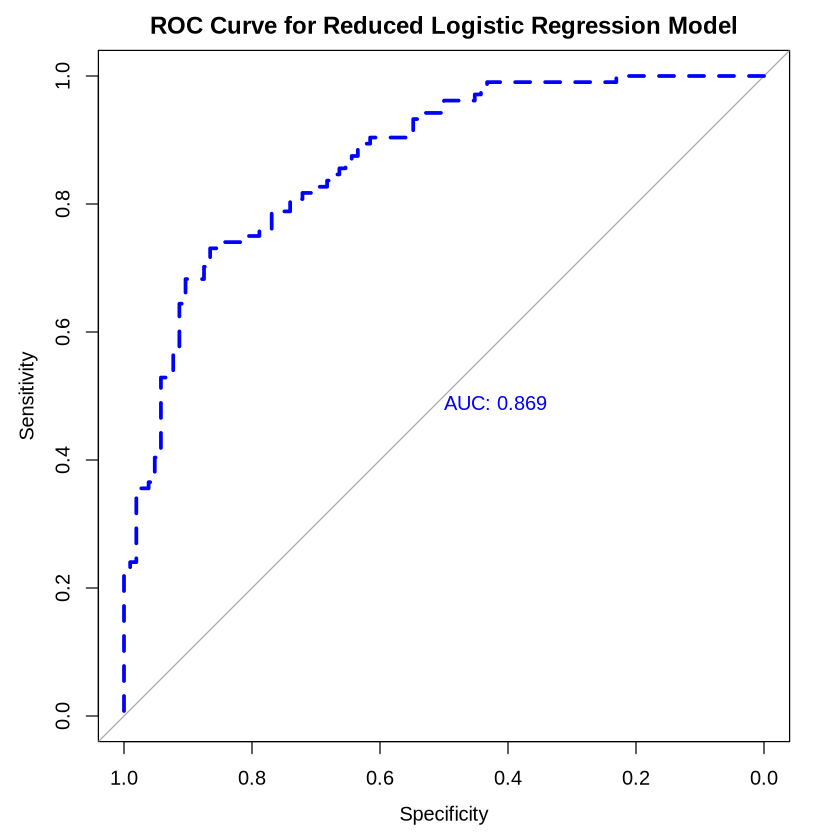

In [7]:
# use ROC visualization based on the worksheet
ROC_full_log <-
    roc(response = diabetes_train$Outcome,
        predictor = predict(reduced_diabetes_model, type = "response"))

plot(ROC_full_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve for Reduced Logistic Regression Model"
)

Our analysis figured that the significant predictor is ```BMI``` and ```Glucose``` based on the significant level at 0.05 (5%). As a result, the ROC curve analysis get the value of 0.843 which indicate a strong model performance. Therefore it can be concluded that there is a pattern found from the explanatory variable that lead to diabetes, we also able to do statistical modelling using Logistic Regression using ```BMI``` and ```Glucose``` as the predictor and got a significant accuracy based on the test dataset and AUC value.